In [1]:
# Import des librairies

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# Pour le clustering

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.manifold import TSNE

# Pour le dendograme et l'agglomerative Clustering

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering

# Pour le DBScan

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

# Pour tester le datetime

import datetime

In [2]:
data = pd.read_csv('data_ready')
#data = pd.read_csv('data_costomor_frac.csv')
data

,Unnamed: 0,customer_unique_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,monetary,review_score,wait_time,expected_wait_time,delay_vs_expected,last_purchase_timestamp,first_purchase_timestamp,frequency,time_on_olist,recency
0,0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21 00:00:00,129.90,12.00,141.90,5.0,6 days 09:52:10,10 days 13:03:33,0.0,2018-05-10 10:56:27,2018-05-10 10:56:27,1,0 days 00:00:00,111
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,2018-05-10 18:02:42,2018-05-15 00:00:00,18.90,8.29,27.19,4.0,3 days 06:51:15,7 days 12:48:33,0.0,2018-05-07 11:11:27,2018-05-07 11:11:27,1,0 days 00:00:00,114
2,2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,2017-04-05 14:38:47,2017-04-07 00:00:00,69.00,17.22,86.22,3.0,25 days 17:33:44,27 days 02:54:57,0.0,2017-03-10 21:05:03,2017-03-10 21:05:03,1,0 days 00:00:00,536
3,3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,2017-11-01 21:23:05,2017-11-13 00:00:00,25.99,17.63,43.62,4.0,20 days 00:53:24,31 days 03:30:19,0.0,2017-10-12 20:29:41,2017-10-12 20:29:41,1,0 days 00:00:00,320
4,4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,2017-11-27 23:08:56,2017-12-05 00:00:00,180.00,16.89,196.89,5.0,13 days 03:23:14,20 days 04:14:18,0.0,2017-11-14 19:45:42,2017-11-14 19:45:42,1,0 days 00:00:00,287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,2017-07-06 09:22:00,2017-08-02 00:00:00,1570.00,497.42,2067.42,5.0,27 days 12:21:24,54 days 02:59:24,0.0,2017-06-08 21:00:36,2017-06-08 21:00:36,1,0 days 00:00:00,446
93354,93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,2018-01-09 22:28:20,2018-01-12 00:00:00,64.89,19.69,84.58,4.0,30 days 02:20:24,32 days 03:52:04,0.0,2017-12-10 20:07:56,2017-12-10 20:07:56,1,0 days 00:00:00,261
93355,93355,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,2017-02-22 12:45:04,2017-03-24 00:00:00,89.90,22.56,112.46,5.0,14 days 20:55:48,44 days 08:10:44,0.0,2017-02-07 15:49:16,2017-02-07 15:49:16,1,0 days 00:00:00,567
93356,93356,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,2018-05-14 11:54:26,2018-05-28 00:00:00,115.00,18.69,133.69,5.0,11 days 20:36:45,25 days 08:42:19,0.0,2018-05-02 15:17:41,2018-05-02 15:17:41,1,0 days 00:00:00,118


In [3]:
# La transformation en Datetime ne semble pas être consérvé on l'applique à nouveau

In [4]:
transform_to_time = ['first_purchase_timestamp']

for columns_time in transform_to_time :
    data[columns_time] = pd.to_datetime(data[columns_time],format='%Y-%m-%d %H:%M:%S',errors = 'coerce')

In [5]:
first_date = min(data['first_purchase_timestamp'])

In [6]:
# On va calculer la date du premier achat dans le dataframe.

first_date = min(data['first_purchase_timestamp'])

# On va créer la colonne ancienneté par rapport au premier achat

data['ancieneté'] = data['first_purchase_timestamp'] - first_date



In [7]:
# On veut le nombre de jour part rapport à la donnée la plus ancienne

data['ancieneté']= data['ancieneté'].apply(lambda x : x.days)

In [8]:
data

,Unnamed: 0,customer_unique_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,monetary,review_score,wait_time,expected_wait_time,delay_vs_expected,last_purchase_timestamp,first_purchase_timestamp,frequency,time_on_olist,recency,ancieneté
0,0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21 00:00:00,129.90,12.00,141.90,5.0,6 days 09:52:10,10 days 13:03:33,0.0,2018-05-10 10:56:27,2018-05-10 10:56:27,1,0 days 00:00:00,111,601
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,2018-05-10 18:02:42,2018-05-15 00:00:00,18.90,8.29,27.19,4.0,3 days 06:51:15,7 days 12:48:33,0.0,2018-05-07 11:11:27,2018-05-07 11:11:27,1,0 days 00:00:00,114,598
2,2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,2017-04-05 14:38:47,2017-04-07 00:00:00,69.00,17.22,86.22,3.0,25 days 17:33:44,27 days 02:54:57,0.0,2017-03-10 21:05:03,2017-03-10 21:05:03,1,0 days 00:00:00,536,176
3,3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,2017-11-01 21:23:05,2017-11-13 00:00:00,25.99,17.63,43.62,4.0,20 days 00:53:24,31 days 03:30:19,0.0,2017-10-12 20:29:41,2017-10-12 20:29:41,1,0 days 00:00:00,320,392
4,4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,2017-11-27 23:08:56,2017-12-05 00:00:00,180.00,16.89,196.89,5.0,13 days 03:23:14,20 days 04:14:18,0.0,2017-11-14 19:45:42,2017-11-14 19:45:42,1,0 days 00:00:00,287,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,2017-07-06 09:22:00,2017-08-02 00:00:00,1570.00,497.42,2067.42,5.0,27 days 12:21:24,54 days 02:59:24,0.0,2017-06-08 21:00:36,2017-06-08 21:00:36,1,0 days 00:00:00,446,266
93354,93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,2018-01-09 22:28:20,2018-01-12 00:00:00,64.89,19.69,84.58,4.0,30 days 02:20:24,32 days 03:52:04,0.0,2017-12-10 20:07:56,2017-12-10 20:07:56,1,0 days 00:00:00,261,451
93355,93355,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,2017-02-22 12:45:04,2017-03-24 00:00:00,89.90,22.56,112.46,5.0,14 days 20:55:48,44 days 08:10:44,0.0,2017-02-07 15:49:16,2017-02-07 15:49:16,1,0 days 00:00:00,567,145
93356,93356,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,2018-05-14 11:54:26,2018-05-28 00:00:00,115.00,18.69,133.69,5.0,11 days 20:36:45,25 days 08:42:19,0.0,2018-05-02 15:17:41,2018-05-02 15:17:41,1,0 days 00:00:00,118,594


<AxesSubplot:xlabel='ancieneté'>

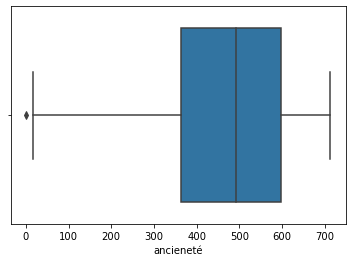

In [9]:
sns.boxplot(x=data['ancieneté'])

In [10]:
# On dirait qu'il vaudrait mieux commencer à 500 jour après l'arrivée du premier client pour avoir un minimum de données
first_date + datetime.timedelta(days=500)

Timestamp('2018-01-28 12:16:38')

In [11]:
def when_to_update(data,init = 500, inc = 7,threshold = 0.8, liste_kmean=['recency','frequency','monetary','review_score']):
    # Renvoir un tableau avec le ARI Score comparé entre un KMean à T0 init et un KMean à T1, T2, T3 incrémenté selon le inc
    std = StandardScaler()
    X_init = std.fit_transform(data[data['ancieneté']<init][liste_kmean])
    ari=[]
    i=0
    while init+i <max_anciennete :
        # Le code a un problème avec les predict trop long. J'essaie avec un predict un peu moins long
        #X_to_predict = X[(X['ancieneté']<init+i) & (X['ancieneté']>400)]
        X_act = std.transform(X[X['ancieneté']<init+i][liste_kmean])
        y_init = np.array(KMeans(n_clusters=5, random_state=0).fit(X_init).predict(X_act))
        y_new = np.array(KMeans(n_clusters=5, random_state=0).fit(X_act).predict(X_act))
        ari.append(adjusted_rand_score(y_init,y_new))
        if adjusted_rand_score(y_init,y_new) < threshold:
            break
        i+=inc
        #print(init+i)
    return ari

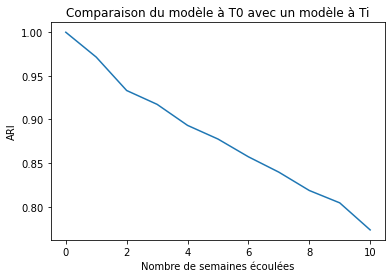

In [12]:
max_anciennete = max(data['ancieneté'])

liste = ['recency','frequency','monetary','review_score','ancieneté']
liste_kmean = ['recency','frequency','monetary','review_score']

X = data[liste].dropna()

ari = when_to_update(X,init = 500 , inc = 7, threshold=0.8)

plt.xlabel('Nombre de semaines écoulées')
plt.ylabel('ARI')
plt.title('Comparaison du modèle à T0 avec un modèle à Ti')
plt.plot(ari)


In [13]:
len(ari)-2

9

In [14]:
# Conclusion, on doit changer de modèle toute les 8 semaines